# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [27]:
#maulana sandy

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [29]:
dataframe = pd.read_csv('Customers.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#***1. Memahami Struktur Data***

In [30]:
print("Dataset Info:")
print(dataframe.info())

print("Initial Rows:")
print(dataframe.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None
Initial Rows:
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6 

#***2. Menangani Data yang Hilang***

In [31]:
# Handling Missing Values
dataframe.dropna(inplace=True)

#***3 dan 4 Analisis Distribusi dan Korelasi dan Visualisasi Data***

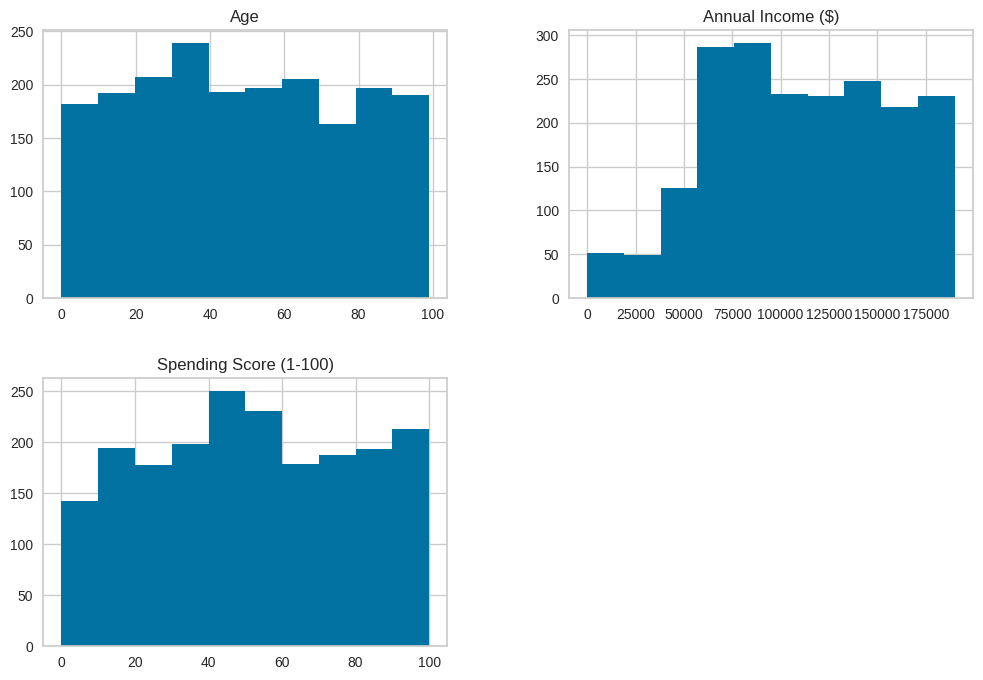

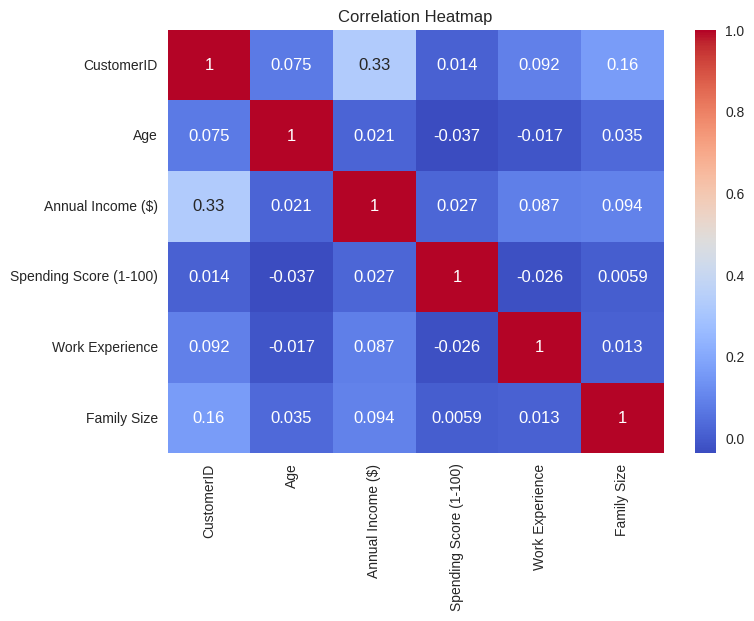

In [32]:
def plot_distribution(data, features):
    data[features].hist(figsize=(12, 8))
    plt.show()

plot_distribution(dataframe, ['Age', 'Annual Income ($)', 'Spending Score (1-100)'])

sns.heatmap(dataframe.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [33]:
encoder = LabelEncoder()
dataframe['Gender'] = encoder.fit_transform(dataframe['Gender'])
dataframe['Profession'] = encoder.fit_transform(dataframe['Profession'])

In [34]:
scaling_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)']
scaler = StandardScaler()
dataframe[scaling_columns] = scaler.fit_transform(dataframe[scaling_columns])
dataframe.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,-1.052345,-2.086675,-0.431850,5,1,4
1,2,1,-0.981941,-1.650205,1.069755,2,3,3
2,3,0,-1.017143,-0.537207,-1.611684,2,1,1
3,4,0,-0.911538,-1.126441,0.926745,7,0,2
4,5,0,-0.629924,-1.584734,-0.396098,3,2,6


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [35]:
def train_kmeans(data, clusters=3):
    model = KMeans(n_clusters=clusters, random_state=42)
    model.fit(data)
    return model

cluster_model = train_kmeans(dataframe, clusters=4)
dataframe['ClusterGroup'] = cluster_model.labels_

In [36]:
# Dekode data kategori yang telah di-encode
dataframe['Gender'] = encoder.inverse_transform(dataframe['Gender'])
dataframe['Profession'] = encoder.inverse_transform(dataframe['Profession'])

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [37]:
numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
numeric_data = dataframe[numeric_columns]

In [38]:
# Hitung Silhouette Score
sil_score = silhouette_score(numeric_data, cluster_model.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5708694533595058


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

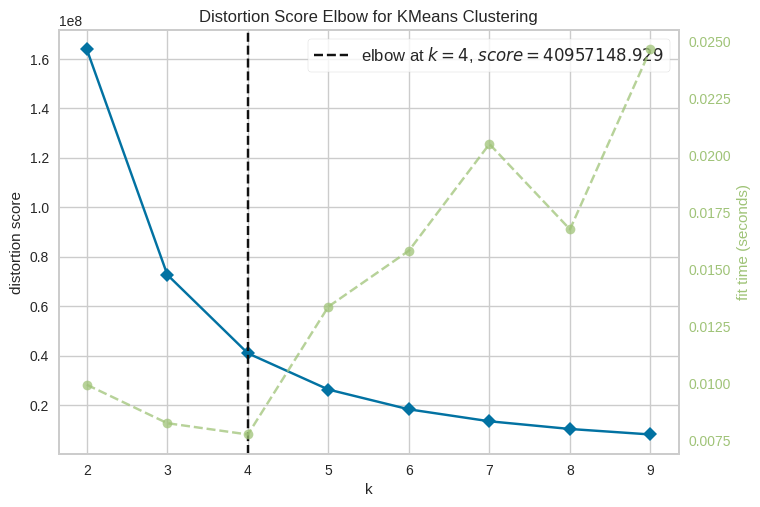

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
# Gunakan data numerik untuk visualisasi elbow
elbow_visual = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
elbow_visual.fit(numeric_data)
elbow_visual.show()

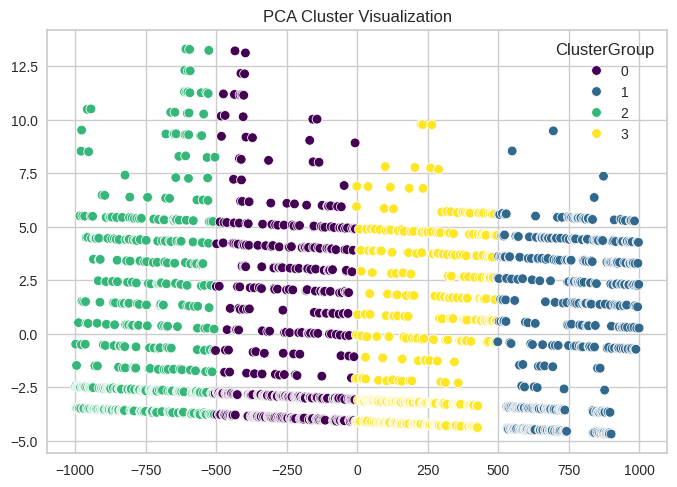

In [40]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_data)
# Visualisasi PCA
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=dataframe['ClusterGroup'], palette='viridis')
plt.title('PCA Cluster Visualization')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [41]:
for cluster_label in dataframe['ClusterGroup'].unique():
    cluster_data = dataframe[dataframe['ClusterGroup'] == cluster_label]
    print(f"\nKarakteristik Cluster {cluster_label}:")
    print(cluster_data.describe())  # Statistik deskriptif
    # Analisis lebih lanjut dapat dilakukan pada kolom spesifik, misal:
    print(f"Rata-rata annual income di cluster {cluster_label}: {cluster_data['Annual Income ($)'].mean()}")



Karakteristik Cluster 2:
       CustomerID         Age  Annual Income ($)  Spending Score (1-100)  \
count  490.000000  490.000000         490.000000              490.000000   
mean   248.408163   -0.136811          -0.663206                0.005498   
std    143.357094    0.874332           1.060214                1.002599   
min      1.000000   -1.721179          -2.414027               -1.826199   
25%    125.250000   -0.805933          -1.448338               -0.789376   
50%    249.500000   -0.313108          -0.799089               -0.002820   
75%    371.750000    0.531735          -0.086421                0.855240   
max    496.000000    1.763797           1.704479                1.749053   

       Work Experience  Family Size  ClusterGroup  
count       490.000000   490.000000         490.0  
mean          4.112245     3.046939           2.0  
std           4.266392     1.678640           0.0  
min           0.000000     1.000000           2.0  
25%           1.000000     2.

Cluster 0:
Karakteristik Utama:

1. Annual Income: Rata-rata positif (0.211), menunjukkan kelompok ini memiliki penghasilan tahunan yang relatif lebih baik dibandingkan Cluster 2.
2. Age: Usia rata-rata hampir nol (-0.014), menunjukkan kelompok ini memiliki distribusi usia yang merata tanpa dominasi kelompok usia tertentu.
3. Spending Score: Rata-rata sedikit negatif (-0.050), menunjukkan kelompok ini cenderung lebih hemat atau kurang boros dalam pengeluaran.
4. Family Size: Ukuran keluarga rata-rata 3.92, lebih besar dibandingkan kelompok lain, mengindikasikan keluarga dengan anggota yang lebih banyak.
5. Work Experience: Cenderung rendah (rata-rata 3.83 tahun), menunjukkan kelompok ini didominasi oleh individu yang kurang berpengalaman.
Interpretasi:
Kelompok ini mencerminkan pelanggan kelas menengah dengan penghasilan stabil, keluarga yang lebih besar, dan pengeluaran yang terkontrol. Mereka potensial untuk produk keluarga atau kebutuhan rumah tangga.

Cluster 1:
Karakteristik Utama:

1. Annual Income: Rata-rata positif tertinggi (0.244), menunjukkan daya beli yang lebih kuat dibandingkan cluster lainnya.
2. Age: Distribusi usia sedikit positif (0.027), menunjukkan kelompok ini sedikit lebih dewasa dibandingkan Cluster 2.
3. Spending Score: Hampir nol (0.012), mengindikasikan pengeluaran yang stabil dan seimbang.
4. Family Size: Ukuran keluarga rata-rata 3.94, menunjukkan keluarga dengan ukuran yang sedikit lebih besar.
5. Work Experience: Rata-rata 4.67 tahun, menunjukkan kelompok ini memiliki pengalaman kerja yang cukup.
Interpretasi:
Cluster ini merepresentasikan pelanggan dengan daya beli tinggi, pengeluaran seimbang, dan potensi untuk produk premium atau program loyalitas.

Cluster 2:
Karakteristik Utama:

1. Annual Income: Rata-rata negatif (-0.663), menunjukkan penghasilan kelompok ini di bawah rata-rata.
2. Age: Usia rata-rata negatif (-0.137), menunjukkan kelompok ini cenderung lebih muda dibandingkan cluster lain.
3. Spending Score: Hampir nol (0.005), mengindikasikan pola pengeluaran yang konservatif.
4. Family Size: Ukuran keluarga rata-rata kecil (3.05), menunjukkan individu atau keluarga kecil.
5. Work Experience: Paling rendah (rata-rata 4.11 tahun), menunjukkan sebagian besar kelompok ini kurang berpengalaman di dunia kerja.
Interpretasi:
Cluster ini terdiri dari pelanggan dengan pendapatan rendah dan keluarga kecil. Mereka lebih tertarik pada produk dengan harga terjangkau atau promosi diskon.

Cluster 3:
Karakteristik Utama:

1. Annual Income: Rata-rata positif (0.205), hampir setara dengan Cluster 0.
2. Age: Usia rata-rata positif (0.123), menunjukkan kelompok ini sedikit lebih dewasa dibandingkan Cluster 0.
3. Spending Score: Positif kecil (0.032), menunjukkan kecenderungan untuk berbelanja sedikit lebih tinggi.
4. Family Size: Ukuran keluarga rata-rata 4.12, tertinggi di antara semua cluster.
5. Work Experience: Rata-rata 3.75 tahun, menunjukkan kelompok ini memiliki pengalaman kerja yang cukup.
Interpretasi:
Cluster ini mencerminkan pelanggan dengan pendapatan stabil, keluarga besar, dan pengeluaran yang sedikit lebih aktif. Mereka potensial untuk produk yang berorientasi pada kebutuhan keluarga besar atau aktivitas bersama.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [42]:
dataframe.to_csv('Clustered_Customers.csv', index=False)